# Scam Prediction in Reddit

Done by : Zineb Bouharra, Rémi Hurstel, Ivo Bonetti, Ihssane Ghalas, Chaimaa Akharaze, Maroua El-Arni

### Problem Statement 

Online scams are a persistent problem on social media platforms, and Reddit is no exception. Scammers often use manipulative tactics to deceive unsuspecting users into participating in fraudulent schemes, which can result in significant financial loss and other negative consequences. Detecting these scams is a challenging task, as scammers use subtle language and psychological techniques to evade detection. Moreover, the vast and diverse nature of Reddit's user-generated content makes it difficult to identify and analyze all potential scam posts and comments manually. As a result, there is a pressing need for an effective scam prediction model for Reddit that can accurately detect and alert users to potential scams.


To address this problem, researchers and developers have been exploring various approaches to predict scams on Reddit. Some of the proposed techniques include using machine learning algorithms, natural language processing, and network analysis to identify patterns and anomalies in Reddit's user-generated content. These approaches aim to develop models that can automatically distinguish between legitimate and fraudulent posts and comments. By leveraging the vast amounts of data available on Reddit, these models can learn to detect subtle cues and characteristics that indicate scam-like behavior.


Therefore, the challenge is to develop an effective scam prediction model for Reddit that can accurately identify and alert users to potential scam posts and comments, ultimately reducing the risk of financial harm and improving the overall safety and trustworthiness of the platform.

### Necessary imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pickle
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ivobo/nltk_data'
    - 'c:\\Users\\ivobo\\anaconda3\\nltk_data'
    - 'c:\\Users\\ivobo\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\ivobo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ivobo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [4]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

The original data contains 147843 examples that we split into train and test datasets as follows :

- The training dataset contains 67% of the original dataset. It is accessible in CSV format in data/train.csv

- The testing dataset contains 33% of the original dataset. It is accessible in CSV format in data/test.csv

In [5]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')


### Data Insights

In [6]:
data_train.head()

,name,comment_karma,link_karma,type,body,subreddit,label
0,whydenny,27304,1343,submission,"[S3Ep7] Who do you think is the ""Beautiful Mon...",KillingEve,0
1,rotmgtrading123,2,3,submission,Selling Skins! Cheapest right now! : I am will...,rotmgtradingpost,1
2,dbo259,4577,6219,submission,What was it like hearing this masterpiece of a...,swans,0
3,Veleda390,96115,2612,comment,10/10 brigading marauders and warmongering neo...,Conservative,0
4,philsmock,28972,7259,submission,Is there any game I can play at a decent frame...,Amd,0


In [6]:
data_train.shape

(99054, 7)

In [7]:
data_test.head()

,name,comment_karma,link_karma,type,body,subreddit,label
0,fite_me_bitch,22008,1,comment,"Apparently so, because that's what this is.",TwoXChromosomes,1
1,lukasr92,88,11,comment,It seems that I don’t get a code for redemptio...,Dashlane,1
2,lilyysreddit,1162,1150,comment,she counted for a while when she crawled,LoveIslandTV,0
3,anahitareddit,4751,634,submission,I may have made this for personal reasons but ...,memes,0
4,lightshayde,2518,575,submission,Thinking about PMO after being free of use for...,NoFap,1


In [8]:
data_test.shape

(48789, 7)

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99054 entries, 0 to 99053
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           99054 non-null  object
 1   comment_karma  99054 non-null  int64 
 2   link_karma     99054 non-null  int64 
 3   type           99054 non-null  object
 4   body           99054 non-null  object
 5   subreddit      99054 non-null  object
 6   label          99054 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [10]:
data_train.describe()

,comment_karma,link_karma,label
count,9.905400e+04,9.905400e+04,99054.000000
mean,1.084470e+04,6.993638e+03,0.303875
std,5.342152e+04,7.614162e+04,0.459931
min,-1.000000e+02,1.000000e+00,0.000000
25%,3.570000e+02,1.000000e+02,0.000000
50%,1.994000e+03,8.900000e+02,0.000000
75%,8.181750e+03,4.408000e+03,1.000000
max,3.141592e+06,4.841046e+06,1.000000


In [11]:
data_train.describe(include=object)

,name,type,body,subreddit
count,99054,99054,99054,99054
unique,9077,2,96208,14653
top,beehale,comment,u/savevideo,AskReddit
freq,20,55996,81,2620


As we can see our dataset contains basically two types of data, some columns are int while the others are object.

In the following part we will do some data exploration to understand more the data.

### Data Exploration

We first check if there are any missing values in the dataset

In [12]:
data_train.isna().sum()

name             0
comment_karma    0
link_karma       0
type             0
body             0
subreddit        0
label            0
dtype: int64

In [13]:
data_train = data_train.dropna(axis=0)

In [14]:
data_test.isna().sum()

name             0
comment_karma    0
link_karma       0
type             0
body             1
subreddit        0
label            0
dtype: int64

In [15]:
data_test = data_test.dropna(axis=0)

Here, we plot the counts of comments and submissions.

comment       55996
submission    43058
Name: type, dtype: int64


<AxesSubplot: >

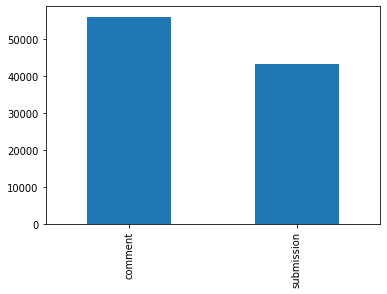

In [16]:
print(data_train.type.value_counts())
data_train.type.value_counts().plot(kind='bar')

And then we plot the count of each label (0,1).

0    68954
1    30100
Name: label, dtype: int64


<AxesSubplot: >

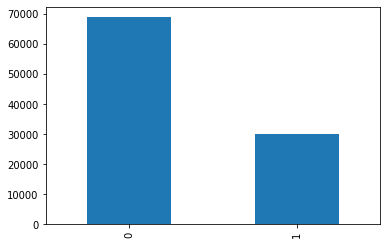

In [17]:
print(data_train.label.value_counts())
data_train.label.value_counts().plot(kind='bar')

Let's plot the distribution of the variable type when it comes to our target.

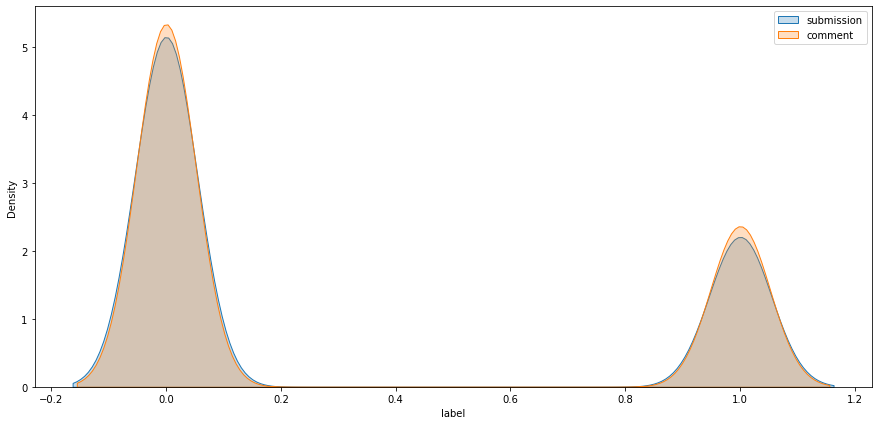

In [23]:
vals = list(data_train['type'].unique())
plt.figure(figsize=(15,7))
for val in vals:
    sns.kdeplot(data_train[data_train['type']==val]['label'],label=val,shade=True)
plt.legend()

Let's now plot the correlation between the numerical features

<AxesSubplot: >

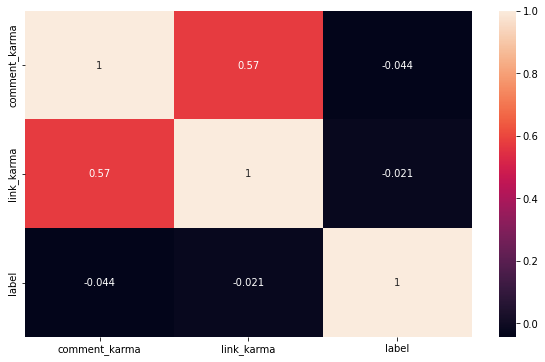

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train.corr(method='pearson'),annot=True)

We can plot a pair plot. This will show us how numerical feature's points are distributed in relation to other features.

[]

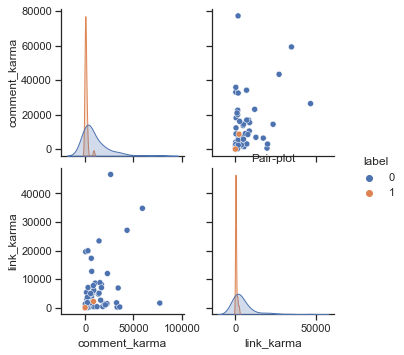

In [109]:

sns.set_theme(style='ticks')
sns.pairplot(data_train.iloc[:100], hue='label')
plt.title('Pair-plot')
plt.plot()

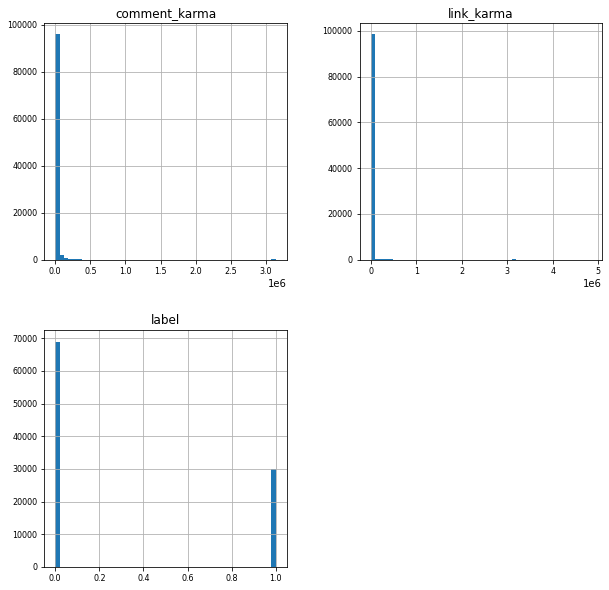

In [41]:
data_train.hist(figsize=(10, 10), bins = 50, xlabelsize=8, ylabelsize=8)
plt.show()

### Pre processing

In [7]:
y_train = data_train['label']
y_test = data_test['label']

del data_train['label']
del data_test['label']

In [8]:
import re
def remove_emoji(string):
    "function to remove emojis"
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("Hilarious 😂! ")

'Hilarious ! '

In [9]:
def preprocessing(x):
     """preprocessing the text"""
     corp = str(x).lower()  #lower
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() #keep text
     #corp = re.sub('[0-9]+', '', corp)
     corp=remove_emoji(corp) # remove emojis
     tokens = word_tokenize(corp) #tokenization
     words = [w for w in tokens if len(w) > 2 if not w in stop_words] # remove stop words and words with less than two caracters
     lemmatize = [lemma.lemmatize(w) for w in words] #lemmatization
     l=(' ').join(lemmatize)
     return l
 
def preprocess(X):
    preprocess_text = [preprocessing(i) for i in X['body']]
    X["preprocessed_body"] = preprocess_text
    return X

In [10]:
### preprocessing train/test
X_train = preprocess(data_train)
X_test = preprocess(data_test)
X_test=X_test.reset_index()
X_train=X_train.reset_index()

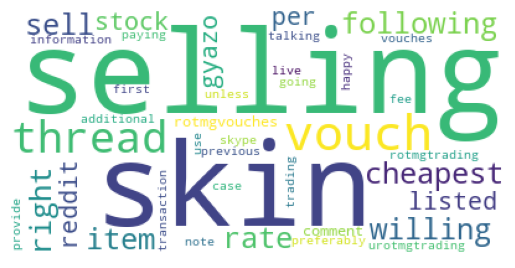

In [11]:
##Scammer 
#pip install wordcloud
text=X_train["preprocessed_body"][1]
wordcloud = WordCloud(background_color = 'white',  max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

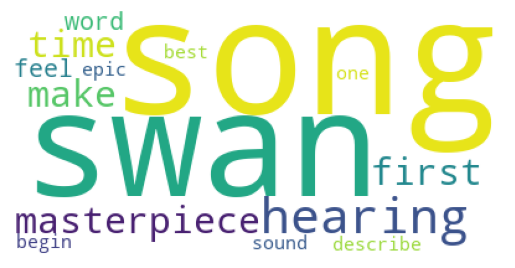

In [12]:
## non Scammer 
text=X_train["preprocessed_body"][2]
wordcloud = WordCloud(background_color = 'white',  max_words = 50).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Baseline model

In [13]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

class get_estimator(BaseEstimator):
    
    def __init__(self):
       
        self.text = ['preprocessed_body']
        self.numerical = ['link_karma','comment_karma']
        self.categorical = ['type',  'subreddit']
        
        self.model = Pipeline([
        ('vect', CountVectorizer(max_features=30000, analyzer='word', stop_words=None)),
        ('tfid', TfidfTransformer()),
        ('clf',  LogisticRegression()),
        ])

        
    def fit(self, X, y):
        X=preprocess(X)
        self.model.fit(X['preprocessed_body'],y)
        return self
 
    def predict(self, X):
        X=preprocess(X)
        pred= self.model.predict(X['preprocessed_body'])
        return pred

In [14]:
model=get_estimator()

In [15]:
model.fit(data_train,y_train)

get_estimator()

In [16]:
val_pred = model.predict(data_test)
print(classification_report(y_test, val_pred))


              precision    recall  f1-score   support

           0       0.76      0.94      0.84     33906
           1       0.70      0.34      0.46     14790

    accuracy                           0.75     48696
   macro avg       0.73      0.64      0.65     48696
weighted avg       0.74      0.75      0.72     48696



In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, val_pred))

0.7546205027106949


In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, val_pred)

0.6373285275398671